Nombre: Pablo César Méndez Rodas                               
Carnet: 22006487            
Text Mining & Image Recognition, sección L                  
PAPD - Tercer trimestre 2023

# LABORATORIO #2

In [8]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Problema 1

In [4]:
def plot_grayscale_image_3d(image):
    # Dimension de imagenes
    height, width = image.shape

    # Coordenadas x y y
    x = np.arange(0, width)
    y = np.arange(0, height)
    X, Y = np.meshgrid(x, y)

    # Aplanamos la imagen y creamos el eje Z
    Z = image.flatten()

    # Creamos la figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, image, cmap='gray')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensity')
    plt.show()

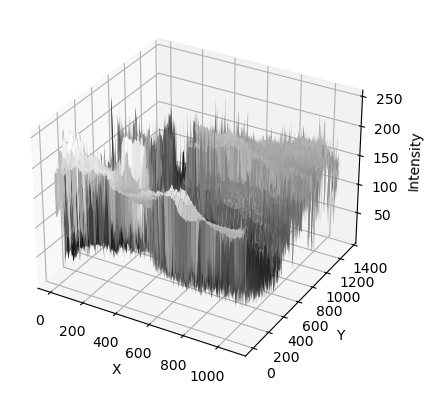

In [5]:
# Example usage
# Load a grayscale image (replace 'your_image_path.png' with the actual image path)
image = plt.imread('laguna.jpeg')
# Convert to grayscale if needed
gray_image = np.mean(image, axis=2)
# Plot the grayscale image in 3D
plot_grayscale_image_3d(gray_image)

## Problema 2

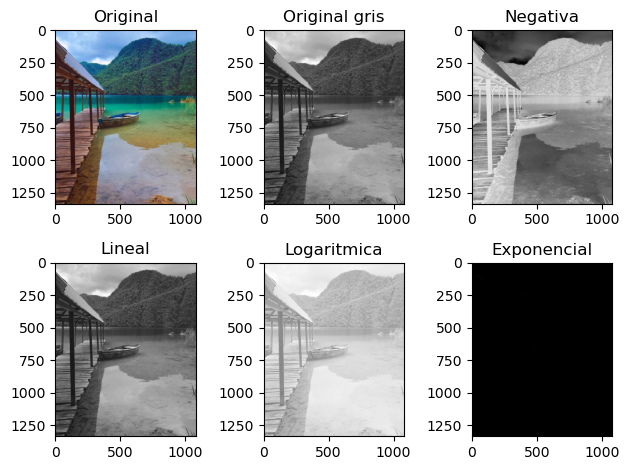

In [6]:

# Transformacion negativa
def negative_transform(image):
    max_value = np.max(image)
    negative_image = max_value - image
    return negative_image

# Transformacion lineal
def linear_transform(image, slope, intercept):
    linear_image = slope * image + intercept
    return linear_image

# Transformacion logaritmica
def logarithmic_transform(image, c):
    logarithmic_image = c * np.log(1 + image)
    return logarithmic_image

# Transformacion exponencial
def exponential_transform(image, c):
    exponential_image = c * np.exp(image)
    return exponential_image


image = plt.imread('laguna.jpeg')
gray_image = np.mean(image, axis=2)

# Aplicamos transformaciones
negative_image = negative_transform(gray_image)
linear_image = linear_transform(gray_image, slope=1, intercept=0)
logarithmic_image = logarithmic_transform(gray_image, c=1)
exponential_image = exponential_transform(gray_image, c=1)

# Ploteamos
plt.subplot(2, 3, 1), plt.imshow(image), plt.title('Original')
plt.subplot(2, 3, 2), plt.imshow(gray_image, cmap='gray'), plt.title('Original gris')
plt.subplot(2, 3, 3), plt.imshow(negative_image, cmap='gray'), plt.title('Negativa')
plt.subplot(2, 3, 4), plt.imshow(linear_image, cmap='gray'), plt.title('Lineal')
plt.subplot(2, 3, 5), plt.imshow(logarithmic_image, cmap='gray'), plt.title('Logaritmica')
plt.subplot(2, 3, 6), plt.imshow(exponential_image, cmap='gray'), plt.title('Exponencial')
plt.tight_layout()
plt.show()

## Problema 3

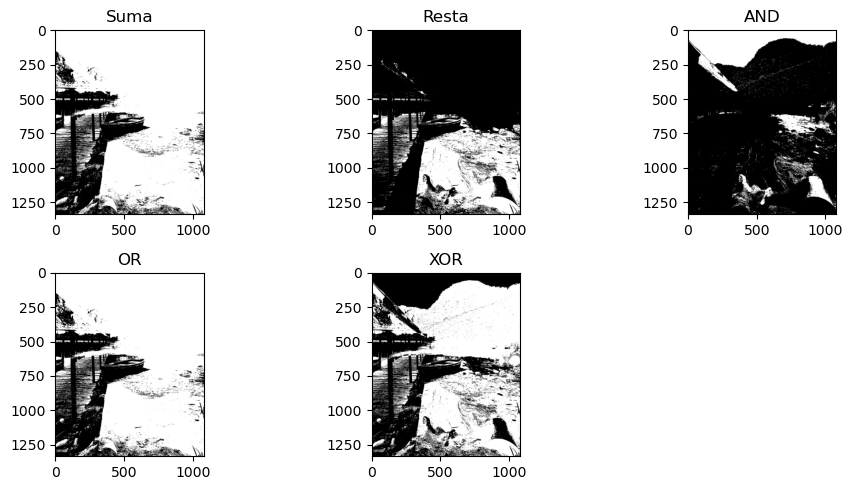

In [5]:
def operaciones(image1, image2):
    # Escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Binarizando las imagenes
    _, binarized_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, binarized_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)
    
    # Operaciones
    result_sum = cv2.add(binarized_image1, binarized_image2)
    result_subtract = cv2.subtract(binarized_image1, binarized_image2)
    result_and = cv2.bitwise_and(binarized_image1, binarized_image2)
    result_or = cv2.bitwise_or(binarized_image1, binarized_image2)
    result_xor = cv2.bitwise_xor(binarized_image1, binarized_image2)
    
    return result_sum, result_subtract, result_and, result_or, result_xor

# Cargamos las imagenes a color
image1 = cv2.imread('laguna.jpeg')
image2 = cv2.imread('lago.jpg')

# Utilizamos la funcion
sum_result, subtract_result, and_result, or_result, xor_result = operaciones(image1, image2)

# Guardamos los resultados
cv2.imwrite("Suma.jpg",sum_result)
cv2.imwrite('Resta.jpg', subtract_result)
cv2.imwrite('AND.jpg', and_result)
cv2.imwrite('OR.jpg', or_result)
cv2.imwrite('XOR.jpg', xor_result)

sum_result = cv2.imread("Suma.jpg")
subtract_result = cv2.imread("Resta.jpg")
and_result = cv2.imread("AND.jpg")
or_result = cv2.imread("OR.jpg")
xor_result = cv2.imread("XOR.jpg")

plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.imshow(sum_result)
plt.title("Suma")

plt.subplot(2, 3, 2)
plt.imshow(subtract_result)
plt.title("Resta")

plt.subplot(2, 3, 3)
plt.imshow(and_result)
plt.title("AND")

plt.subplot(2, 3, 4)
plt.imshow(or_result)
plt.title("OR")

plt.subplot(2, 3, 5)
plt.imshow(xor_result)
plt.title("XOR")
plt.tight_layout()
plt.show()



## Problema 4

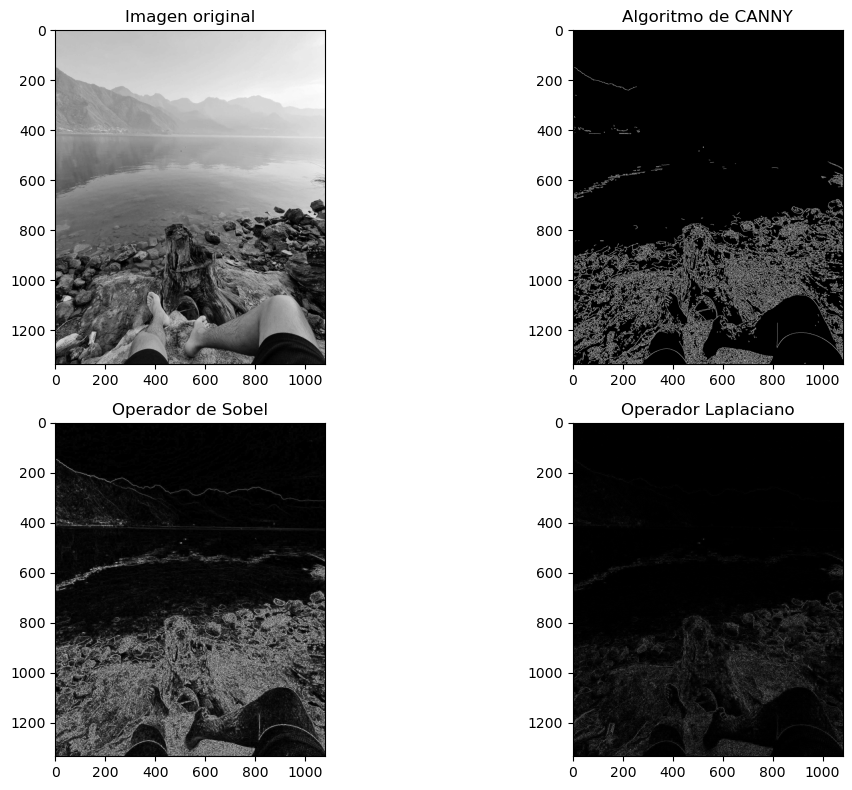

,Enfoques,Ventajas,Desventajas
0,Canny,Detecta los bordes con mucha precision y poco ...,Pierde bordes
1,Sobel,Detectó muy bien las montañas que eran dificil...,Puede mostrar bordes muy pronunciados
2,Laplaciano,Fácil de implementar y detecta cambios de inte...,Se observa mucho ruido.


In [12]:
#Cargamos la imagen
image = cv2.imread('lago.jpg', cv2.IMREAD_GRAYSCALE)

#Algoritmo de CANNY
canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)

#Operador de Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

#Operador Laplaciano
laplacian_edges = cv2.Laplacian(image, cv2.CV_8U)

#Mostramos resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen original")

plt.subplot(2, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title("Algoritmo de CANNY")

plt.subplot(2, 2, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Operador de Sobel")

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Operador Laplaciano")

plt.tight_layout()
plt.show()

# Comparison Table
enfoques = ['Canny', 'Sobel', 'Laplaciano']
ventajas = [
    'Detecta los bordes con mucha precision y poco ruido',
    'Detectó muy bien las montañas que eran dificiles de ver',
    'Fácil de implementar y detecta cambios de intensidad'
]
desventajas = [
    'Pierde bordes',
    'Puede mostrar bordes muy pronunciados',
    'Se observa mucho ruido.'
]

comparison_table = {'Enfoques': enfoques, 'Ventajas': ventajas, 'Desventajas': desventajas}
comparison_df = pd.DataFrame(comparison_table)

comparison_df

## Problema 5

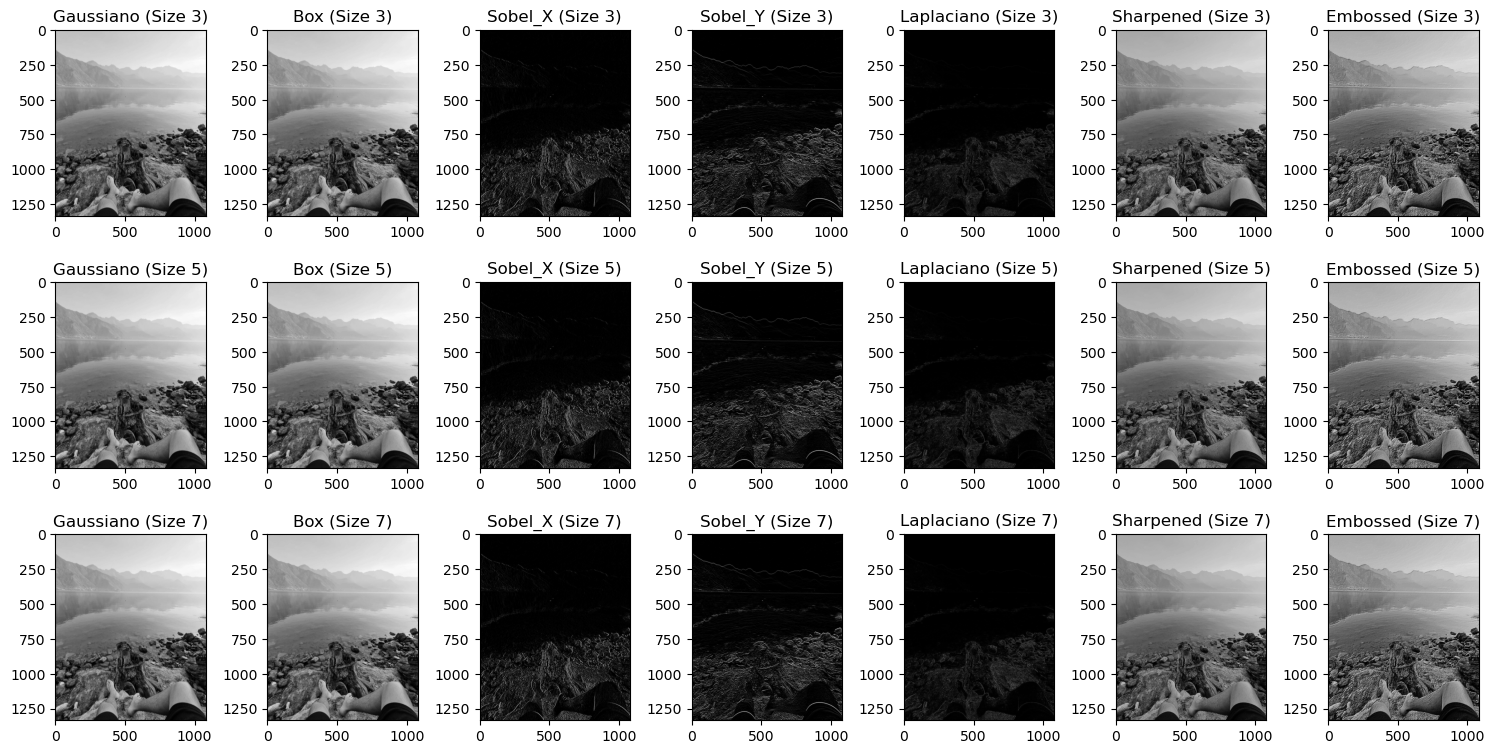

In [15]:
#Cargamos la imagen
image = cv2.imread('lago.jpg', cv2.IMREAD_GRAYSCALE)

#Tamaños de Kernel
kernel_sizes = [3, 5, 7]

gaussian_kernel = cv2.getGaussianKernel(7, 1.5)
box_kernel = np.ones((3, 3), np.float32) / 9
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
embossing_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

#Filtros de convolucion
results = {}
for size in kernel_sizes:
    gaussian_filtered = cv2.filter2D(image, -1, gaussian_kernel)
    box_filtered = cv2.filter2D(image, -1, box_kernel)
    sobel_x_filtered = cv2.filter2D(image, -1, sobel_kernel_x)
    sobel_y_filtered = cv2.filter2D(image, -1, sobel_kernel_y)
    laplacian_filtered = cv2.filter2D(image, -1, laplacian_kernel)
    sharpened = cv2.filter2D(image, -1, sharpening_kernel)
    embossed = cv2.filter2D(image, -1, embossing_kernel)
    
    #Guardamos resultados
    results[size] = {
        'Gaussiano': gaussian_filtered,
        'Box': box_filtered,
        'Sobel_X': sobel_x_filtered,
        'Sobel_Y': sobel_y_filtered,
        'Laplaciano': laplacian_filtered,
        'Sharpened': sharpened,
        'Embossed': embossed
    }

# Display the results
subplot_columns = 7  # Number of subplots per row
subplot_rows = len(kernel_sizes) * len(results[kernel_sizes[0]]) // subplot_columns + 1

plt.figure(figsize=(15, 10))

subplot_index = 1
for size in kernel_sizes:
    for filter_name, filter_result in results[size].items():
        plt.subplot(subplot_rows, subplot_columns, subplot_index)
        plt.imshow(filter_result, cmap='gray')
        plt.title(f'{filter_name} (Size {size})')
        subplot_index += 1

plt.tight_layout()
plt.show()